In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
math = pd.read_excel("student_mat.xlsx")

In [3]:
math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [5]:
math.dtypes[math.dtypes == 'int64'].index.values

array(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'G3'], dtype=object)

In [6]:
math['failures'].value_counts()

0    312
1     50
2     17
3     16
Name: failures, dtype: int64

In [7]:
math['absences'].value_counts()

0     115
2      65
4      53
6      31
8      22
10     17
14     12
12     12
3       8
7       7
16      7
18      5
5       5
20      4
22      3
13      3
1       3
9       3
11      3
15      3
23      1
24      1
21      1
25      1
56      1
26      1
28      1
30      1
17      1
38      1
40      1
54      1
19      1
75      1
Name: absences, dtype: int64

In [8]:
# y_train = y_train.values.reshape(-1,1)

In [9]:
for col in math.columns: 
    print(col) 

school
sex
age
address
famsize
Pstatus
Medu
Fedu
Mjob
Fjob
reason
guardian
traveltime
studytime
failures
schoolsup
famsup
paid
activities
nursery
higher
internet
romantic
famrel
freetime
goout
Dalc
Walc
health
absences
G1
G2
G3


In [10]:
# X = math[["sex", "age", "famsize","Pstatus","Medu", "Fedu", "reason", "guardian", "traveltime", "failures", "activities", "freetime", "health", "absences", "activities", "higher", "romantic", "famrel", "health"]]
X = math[["failures"]]
y = math["G3"].values.reshape(-1, 1)
print(X.shape, y.shape)

(395, 1) (395, 1)


In [11]:
math['G3'].mean()

10.415189873417722

In [12]:
# plt
# plt.scatter(math['failures'], math['G3'])
# math.groupby('absences').mean()['G3']


In [13]:
from sklearn.feature_selection import SelectKBest, f_regression
selectKBestModel = SelectKBest(f_regression)
x_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences']
X = math[x_cols]
y = math['G3']

selectKBestModel.fit(X, y)

pd.DataFrame({
    'x_feature' : x_cols,
    'scores': selectKBestModel.scores_
}).sort_values('scores', ascending=False)
    


,x_feature,scores
5,failures,58.671666
1,Medu,19.448184
0,age,10.535470
2,Fedu,9.351913
8,goout,7.054389
3,traveltime,5.467880
4,studytime,3.796826
11,health,1.484023
9,Dalc,1.177693
10,Walc,1.063061


Text(0, 0.5, 'G3 scores')

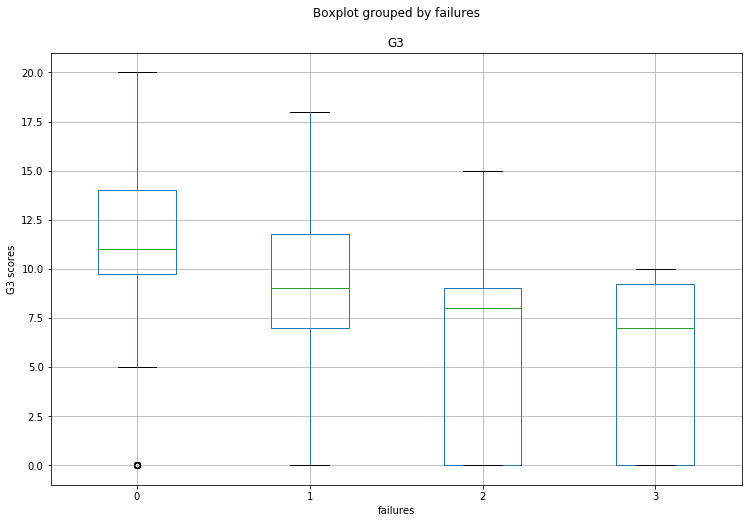

In [14]:
# failures = number of past class failures (numeric: n if 1<=n<3, else 4)

ax = math.boxplot(by='failures', column='G3', figsize=(12,8))
ax.set_ylabel('G3 scores')

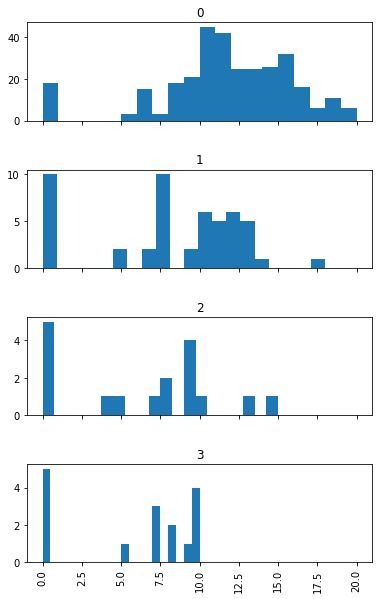

In [15]:

math.hist(by='failures', column='G3', sharex=True,layout=(4, 1), figsize=(6, 10), bins=20)
plt.show()

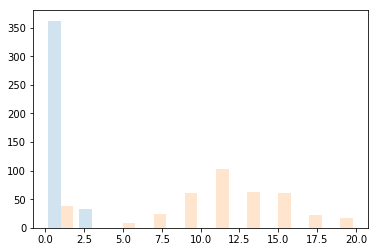

In [16]:
plt.hist([math['failures'],math['G3']],
          bins=10, alpha=0.2)#, color = ['r','])
plt.show()

In [17]:
from scipy import stats
#https://stackoverflow.com/a/22221675/1175496
g3_scores_for_each_failure_group_series = math.groupby('failures')['G3'].apply(list)
g3_scores_for_each_failure_group_series


failures
0    [6, 6, 15, 10, 15, 11, 6, 19, 15, 9, 12, 14, 1...
1    [11, 9, 7, 10, 10, 10, 10, 13, 8, 12, 14, 12, ...
2    [8, 5, 8, 0, 0, 0, 9, 10, 0, 7, 0, 4, 9, 13, 9...
3    [10, 5, 10, 9, 0, 0, 10, 0, 0, 10, 7, 0, 7, 8,...
Name: G3, dtype: object

In [18]:
import pprint
g3_scores_for_each_failure_group_series.values

array([list([6, 6, 15, 10, 15, 11, 6, 19, 15, 9, 12, 14, 11, 16, 14, 14, 10, 10, 15, 15, 16, 12, 8, 11, 15, 11, 11, 12, 17, 16, 12, 15, 6, 18, 15, 11, 13, 12, 18, 11, 6, 11, 20, 14, 13, 13, 11, 13, 10, 15, 15, 9, 16, 11, 11, 9, 9, 10, 15, 12, 6, 8, 16, 15, 10, 14, 11, 10, 10, 11, 5, 12, 11, 6, 15, 10, 6, 14, 7, 8, 18, 6, 10, 14, 15, 10, 14, 8, 5, 17, 14, 6, 18, 11, 8, 18, 13, 16, 19, 19, 9, 16, 14, 13, 13, 15, 15, 13, 13, 8, 12, 11, 18, 0, 12, 11, 0, 0, 0, 15, 0, 11, 13, 11, 11, 0, 12, 8, 13, 15, 10, 10, 16, 0, 14, 16, 10, 9, 9, 11, 6, 9, 11, 8, 12, 17, 8, 12, 11, 11, 15, 9, 10, 13, 9, 8, 10, 14, 15, 16, 10, 10, 16, 10, 10, 6, 11, 13, 10, 7, 8, 13, 14, 10, 15, 8, 10, 6, 17, 13, 14, 15, 12, 9, 12, 14, 11, 9, 13, 6, 10, 13, 12, 11, 12, 12, 0, 12, 0, 18, 13, 15, 10, 8, 12, 13, 11, 14, 0, 18, 8, 12, 9, 0, 17, 10, 11, 10, 0, 14, 11, 14, 10, 12, 9, 9, 10, 8, 12, 10, 11, 11, 19, 12, 14, 15, 11, 15, 18, 14, 11, 0, 8, 14, 16, 11, 10, 14, 18, 18, 13, 0, 9, 10, 11, 13, 9, 11, 15, 15, 11, 16, 10, 

In [19]:
#ANOVA used to obtain pvalue (looking for value less than 5% to assess statistical significance of exploring features
# followed by exploration of individual features)

stats.f_oneway(*g3_scores_for_each_failure_group_series.values)

F_onewayResult(statistic=20.778270848358368, pvalue=1.6421656015988342e-12)

In [20]:
stats.f_oneway(* math.groupby('absences')['G3'].apply(list).values)

F_onewayResult(statistic=1.564658904053701, pvalue=0.027446634307480493)

In [21]:
stats.f_oneway(* math.groupby('failures')['G3'].apply(list).values)

F_onewayResult(statistic=20.778270848358368, pvalue=1.6421656015988342e-12)

In [22]:
stats.f_oneway(* math.groupby('studytime')['G3'].apply(list).values)

F_onewayResult(statistic=1.7278351054436039, pvalue=0.1607228096836598)

In [23]:
import matplotlib.pyplot as plt

# math['failures'].value_counts()
# math.loc[math['failures']== 0]['G3'].hist()
# math.loc[math['failures']== 1]['G3'].hist()
# math.loc[math['failures']== 2]['G3'].hist()
# math.loc[math['failures']== 3]['G3'].hist()
# print(math.loc[math['failures']== 0]['G3'].mean())
# print(math.loc[math['failures']== 1]['G3'].mean())
# print(math.loc[math['failures']== 2]['G3'].mean())
# print(math.loc[math['failures']== 3]['G3'].mean())


In [24]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
16,16,4,4,1,3,0,3,2,3,1,2,2,6
66,15,4,4,1,4,0,1,3,3,5,5,3,4
211,17,4,4,1,2,0,5,3,5,4,5,3,13
7,17,4,4,2,2,0,4,1,4,1,1,1,6
19,16,4,3,1,1,0,3,1,3,1,3,5,4


In [25]:
y_train = y_train.values.reshape(-1,1)

In [26]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train) 

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [27]:
y_test = y_test.values.reshape(-1,1)

In [28]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X_train_scaled, y_train_scaled)

test_score = model.score(X_test_scaled, y_test_scaled)
train_score = model.score(X_train_scaled, y_train_scaled)
print(f"R2 train Score: {train_score}, R2 test {test_score}")

R2 train Score: 0.17797071630726047, R2 test 0.16678049666776373


In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with "best" feature indicated from SKBest (feature as listed above) in X
model.fit(X_train_scaled[:,5].reshape(-1,1), y_train_scaled)
test_score = model.score(X_test_scaled[:,5].reshape(-1,1), y_test_scaled)
train_score = model.score(X_train_scaled[:,5].reshape(-1,1), y_train_scaled)
print(f"R2 train Score: {train_score}, R2 test {test_score}")

R2 train Score: 0.12660303634847003, R2 test 0.13786599866604565


In [31]:
0.1378/0.1667

0.8266346730653871

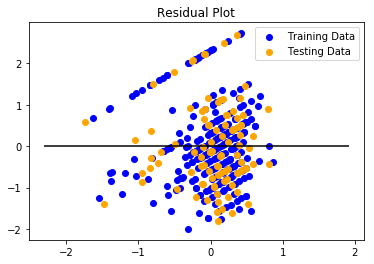

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [33]:
y_predicted = model.predict(X_test_scaled)

In [34]:
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
rmse = mean_squared_error(y_test_scaled ,y_predicted)
r2= r2_score(y_test_scaled, y_predicted)

In [36]:
print('Slope:' , model.coef_)
print('Intercept:', model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.07755159  0.1652897  -0.1068962  -0.03292191  0.07210966 -0.30805566
   0.06896864  0.04252563 -0.15049921 -0.02412334  0.10524573 -0.03912348
   0.05842191]]
Intercept: [-1.00669243e-16]
Root mean squared error:  0.9488651449940346
R2 score:  0.16678049666776373


(99, 1)


Text(0, 0.5, 'y')

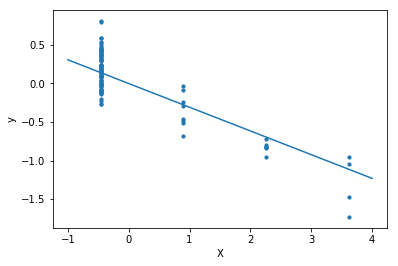

In [37]:

print(y_predicted.shape)
model.coef_[:,5]
failures_on_smooth_line = np.linspace(-1,4, 1000)
predicted_g3_on_smooth_line = [failure_point *-0.30805566 for failure_point in failures_on_smooth_line]
# g3 = -0.30805566 * failures 
plt.scatter(X_test_scaled[:,5], y_predicted, s=10)
plt.plot(failures_on_smooth_line, predicted_g3_on_smooth_line)
plt.xlabel('X')
plt.ylabel('y')


In [38]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

Using TensorFlow backend.


In [40]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(13, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(100, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(100, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(100, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_7 (Dense)              (None, 100)               1400      
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_9 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 101       
Total params: 21,883
Trainable params: 21,883
Non-trainable params: 0
_________________________________________________________________


In [41]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [42]:
NN_model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Instructions for updating:
Use tf.cast instead.
Train on 236 samples, validate on 60 samples
Epoch 1/500
236/236 [==============================] - 0s 2ms/step - loss: 10.2921 - mean_absolute_error: 10.2921 - val_loss: 10.4700 - val_mean_absolute_error: 10.4700

Epoch 00001: val_loss improved from inf to 10.47001, saving model to Weights-001--10.47001.hdf5
Epoch 2/500
236/236 [==============================] - 0s 70us/step - loss: 10.0647 - mean_absolute_error: 10.0647 - val_loss: 9.9871 - val_mean_absolute_error: 9.9871

Epoch 00002: val_loss improved from 10.47001 to 9.98708, saving model to Weights-002--9.98708.hdf5
Epoch 3/500
236/236 [==============================] - 0s 112us/step - loss: 9.2530 - mean_absolute_error: 9.2530 - val_loss: 8.2416 - val_mean_absolute_error: 8.2416

Epoch 00003: val_loss improved from 9.98708 to 8.24163, saving model to Weights-003--8.24163.hdf5
Epoch 4/500
236/236 [==============================] - 0s 98us/step - loss: 6.6442 - mean_absolute_error: 6


Epoch 00031: val_loss improved from 3.11713 to 3.10536, saving model to Weights-031--3.10536.hdf5
Epoch 32/500
236/236 [==============================] - 0s 78us/step - loss: 3.3669 - mean_absolute_error: 3.3669 - val_loss: 3.1080 - val_mean_absolute_error: 3.1080

Epoch 00032: val_loss did not improve from 3.10536
Epoch 33/500
236/236 [==============================] - 0s 102us/step - loss: 3.4422 - mean_absolute_error: 3.4422 - val_loss: 3.0965 - val_mean_absolute_error: 3.0965

Epoch 00033: val_loss improved from 3.10536 to 3.09648, saving model to Weights-033--3.09648.hdf5
Epoch 34/500
236/236 [==============================] - 0s 66us/step - loss: 3.3938 - mean_absolute_error: 3.3938 - val_loss: 3.0930 - val_mean_absolute_error: 3.0930

Epoch 00034: val_loss improved from 3.09648 to 3.09298, saving model to Weights-034--3.09298.hdf5
Epoch 35/500
236/236 [==============================] - 0s 75us/step - loss: 3.3641 - mean_absolute_error: 3.3641 - val_loss: 3.1258 - val_mean_absol

236/236 [==============================] - 0s 102us/step - loss: 3.1046 - mean_absolute_error: 3.1046 - val_loss: 3.1584 - val_mean_absolute_error: 3.1584

Epoch 00068: val_loss did not improve from 3.08109
Epoch 69/500
236/236 [==============================] - 0s 95us/step - loss: 3.1148 - mean_absolute_error: 3.1148 - val_loss: 3.1369 - val_mean_absolute_error: 3.1369

Epoch 00069: val_loss did not improve from 3.08109
Epoch 70/500
236/236 [==============================] - 0s 104us/step - loss: 3.0852 - mean_absolute_error: 3.0852 - val_loss: 3.1523 - val_mean_absolute_error: 3.1523

Epoch 00070: val_loss did not improve from 3.08109
Epoch 71/500
236/236 [==============================] - 0s 98us/step - loss: 3.0873 - mean_absolute_error: 3.0873 - val_loss: 3.1830 - val_mean_absolute_error: 3.1830

Epoch 00071: val_loss did not improve from 3.08109
Epoch 72/500
236/236 [==============================] - 0s 93us/step - loss: 3.0877 - mean_absolute_error: 3.0877 - val_loss: 3.1186 - 

236/236 [==============================] - 0s 97us/step - loss: 3.0283 - mean_absolute_error: 3.0283 - val_loss: 3.1360 - val_mean_absolute_error: 3.1360

Epoch 00105: val_loss did not improve from 3.08109
Epoch 106/500
236/236 [==============================] - 0s 89us/step - loss: 3.0662 - mean_absolute_error: 3.0662 - val_loss: 3.1093 - val_mean_absolute_error: 3.1093

Epoch 00106: val_loss did not improve from 3.08109
Epoch 107/500
236/236 [==============================] - 0s 92us/step - loss: 3.0827 - mean_absolute_error: 3.0827 - val_loss: 3.1102 - val_mean_absolute_error: 3.1102

Epoch 00107: val_loss did not improve from 3.08109
Epoch 108/500
236/236 [==============================] - 0s 107us/step - loss: 3.0480 - mean_absolute_error: 3.0480 - val_loss: 3.1396 - val_mean_absolute_error: 3.1396

Epoch 00108: val_loss did not improve from 3.08109
Epoch 109/500
236/236 [==============================] - 0s 86us/step - loss: 3.1464 - mean_absolute_error: 3.1464 - val_loss: 3.1158

236/236 [==============================] - 0s 105us/step - loss: 2.9446 - mean_absolute_error: 2.9446 - val_loss: 3.1441 - val_mean_absolute_error: 3.1441

Epoch 00142: val_loss did not improve from 3.08109
Epoch 143/500
236/236 [==============================] - 0s 98us/step - loss: 2.9565 - mean_absolute_error: 2.9565 - val_loss: 3.1002 - val_mean_absolute_error: 3.1002

Epoch 00143: val_loss did not improve from 3.08109
Epoch 144/500
236/236 [==============================] - 0s 105us/step - loss: 2.9193 - mean_absolute_error: 2.9193 - val_loss: 3.0704 - val_mean_absolute_error: 3.0704

Epoch 00144: val_loss improved from 3.08109 to 3.07044, saving model to Weights-144--3.07044.hdf5
Epoch 145/500
236/236 [==============================] - 0s 70us/step - loss: 2.9352 - mean_absolute_error: 2.9352 - val_loss: 3.0800 - val_mean_absolute_error: 3.0800

Epoch 00145: val_loss did not improve from 3.07044
Epoch 146/500
236/236 [==============================] - 0s 91us/step - loss: 2.9192 


Epoch 00177: val_loss did not improve from 2.98549
Epoch 178/500
236/236 [==============================] - 0s 119us/step - loss: 2.8781 - mean_absolute_error: 2.8781 - val_loss: 3.1263 - val_mean_absolute_error: 3.1263

Epoch 00178: val_loss did not improve from 2.98549
Epoch 179/500
236/236 [==============================] - 0s 123us/step - loss: 2.8773 - mean_absolute_error: 2.8773 - val_loss: 2.9722 - val_mean_absolute_error: 2.9722

Epoch 00179: val_loss improved from 2.98549 to 2.97222, saving model to Weights-179--2.97222.hdf5
Epoch 180/500
236/236 [==============================] - 0s 63us/step - loss: 2.8574 - mean_absolute_error: 2.8574 - val_loss: 3.0038 - val_mean_absolute_error: 3.0038

Epoch 00180: val_loss did not improve from 2.97222
Epoch 181/500
236/236 [==============================] - 0s 96us/step - loss: 2.8286 - mean_absolute_error: 2.8286 - val_loss: 3.0603 - val_mean_absolute_error: 3.0603

Epoch 00181: val_loss did not improve from 2.97222
Epoch 182/500
236/2

236/236 [==============================] - 0s 114us/step - loss: 2.9123 - mean_absolute_error: 2.9123 - val_loss: 2.9717 - val_mean_absolute_error: 2.9717

Epoch 00214: val_loss did not improve from 2.92217
Epoch 215/500
236/236 [==============================] - 0s 148us/step - loss: 2.8754 - mean_absolute_error: 2.8754 - val_loss: 2.8782 - val_mean_absolute_error: 2.8782

Epoch 00215: val_loss improved from 2.92217 to 2.87824, saving model to Weights-215--2.87824.hdf5
Epoch 216/500
236/236 [==============================] - 0s 71us/step - loss: 2.8654 - mean_absolute_error: 2.8654 - val_loss: 2.9635 - val_mean_absolute_error: 2.9635

Epoch 00216: val_loss did not improve from 2.87824
Epoch 217/500
236/236 [==============================] - 0s 117us/step - loss: 2.7987 - mean_absolute_error: 2.7987 - val_loss: 3.0522 - val_mean_absolute_error: 3.0522

Epoch 00217: val_loss did not improve from 2.87824
Epoch 218/500
236/236 [==============================] - 0s 140us/step - loss: 2.748

236/236 [==============================] - 0s 94us/step - loss: 2.7071 - mean_absolute_error: 2.7071 - val_loss: 3.1748 - val_mean_absolute_error: 3.1748

Epoch 00251: val_loss did not improve from 2.87824
Epoch 252/500
236/236 [==============================] - 0s 99us/step - loss: 2.6750 - mean_absolute_error: 2.6750 - val_loss: 3.0852 - val_mean_absolute_error: 3.0852

Epoch 00252: val_loss did not improve from 2.87824
Epoch 253/500
236/236 [==============================] - 0s 90us/step - loss: 2.6741 - mean_absolute_error: 2.6741 - val_loss: 3.0408 - val_mean_absolute_error: 3.0408

Epoch 00253: val_loss did not improve from 2.87824
Epoch 254/500
236/236 [==============================] - 0s 98us/step - loss: 2.6746 - mean_absolute_error: 2.6746 - val_loss: 3.0447 - val_mean_absolute_error: 3.0447

Epoch 00254: val_loss did not improve from 2.87824
Epoch 255/500
236/236 [==============================] - 0s 97us/step - loss: 2.7303 - mean_absolute_error: 2.7303 - val_loss: 3.0126 

236/236 [==============================] - 0s 94us/step - loss: 2.5829 - mean_absolute_error: 2.5829 - val_loss: 3.0563 - val_mean_absolute_error: 3.0563

Epoch 00288: val_loss did not improve from 2.85006
Epoch 289/500
236/236 [==============================] - 0s 94us/step - loss: 2.7119 - mean_absolute_error: 2.7119 - val_loss: 3.0261 - val_mean_absolute_error: 3.0261

Epoch 00289: val_loss did not improve from 2.85006
Epoch 290/500
236/236 [==============================] - 0s 94us/step - loss: 2.6755 - mean_absolute_error: 2.6755 - val_loss: 3.3233 - val_mean_absolute_error: 3.3233

Epoch 00290: val_loss did not improve from 2.85006
Epoch 291/500
236/236 [==============================] - 0s 105us/step - loss: 2.5697 - mean_absolute_error: 2.5697 - val_loss: 3.2295 - val_mean_absolute_error: 3.2295

Epoch 00291: val_loss did not improve from 2.85006
Epoch 292/500
236/236 [==============================] - 0s 99us/step - loss: 2.6197 - mean_absolute_error: 2.6197 - val_loss: 3.1763

236/236 [==============================] - 0s 72us/step - loss: 2.4701 - mean_absolute_error: 2.4701 - val_loss: 3.2561 - val_mean_absolute_error: 3.2561

Epoch 00325: val_loss did not improve from 2.85006
Epoch 326/500
236/236 [==============================] - 0s 66us/step - loss: 2.4678 - mean_absolute_error: 2.4678 - val_loss: 3.2241 - val_mean_absolute_error: 3.2241

Epoch 00326: val_loss did not improve from 2.85006
Epoch 327/500
236/236 [==============================] - 0s 69us/step - loss: 2.4792 - mean_absolute_error: 2.4792 - val_loss: 3.3414 - val_mean_absolute_error: 3.3414

Epoch 00327: val_loss did not improve from 2.85006
Epoch 328/500
236/236 [==============================] - 0s 68us/step - loss: 2.4708 - mean_absolute_error: 2.4708 - val_loss: 3.2702 - val_mean_absolute_error: 3.2702

Epoch 00328: val_loss did not improve from 2.85006
Epoch 329/500
236/236 [==============================] - 0s 88us/step - loss: 2.5613 - mean_absolute_error: 2.5613 - val_loss: 3.1398 

236/236 [==============================] - 0s 89us/step - loss: 2.5213 - mean_absolute_error: 2.5213 - val_loss: 3.1221 - val_mean_absolute_error: 3.1221

Epoch 00362: val_loss did not improve from 2.85006
Epoch 363/500
236/236 [==============================] - 0s 97us/step - loss: 2.3927 - mean_absolute_error: 2.3927 - val_loss: 3.3018 - val_mean_absolute_error: 3.3018

Epoch 00363: val_loss did not improve from 2.85006
Epoch 364/500
236/236 [==============================] - 0s 99us/step - loss: 2.4604 - mean_absolute_error: 2.4604 - val_loss: 3.3356 - val_mean_absolute_error: 3.3356

Epoch 00364: val_loss did not improve from 2.85006
Epoch 365/500
236/236 [==============================] - 0s 84us/step - loss: 2.3794 - mean_absolute_error: 2.3794 - val_loss: 3.2421 - val_mean_absolute_error: 3.2421

Epoch 00365: val_loss did not improve from 2.85006
Epoch 366/500
236/236 [==============================] - 0s 98us/step - loss: 2.4054 - mean_absolute_error: 2.4054 - val_loss: 3.3497 

236/236 [==============================] - 0s 85us/step - loss: 2.3266 - mean_absolute_error: 2.3266 - val_loss: 3.3493 - val_mean_absolute_error: 3.3493

Epoch 00399: val_loss did not improve from 2.85006
Epoch 400/500
236/236 [==============================] - 0s 86us/step - loss: 2.2992 - mean_absolute_error: 2.2992 - val_loss: 3.3120 - val_mean_absolute_error: 3.3120

Epoch 00400: val_loss did not improve from 2.85006
Epoch 401/500
236/236 [==============================] - 0s 87us/step - loss: 2.3288 - mean_absolute_error: 2.3288 - val_loss: 3.2790 - val_mean_absolute_error: 3.2790

Epoch 00401: val_loss did not improve from 2.85006
Epoch 402/500
236/236 [==============================] - 0s 93us/step - loss: 2.4370 - mean_absolute_error: 2.4370 - val_loss: 3.2093 - val_mean_absolute_error: 3.2093

Epoch 00402: val_loss did not improve from 2.85006
Epoch 403/500
236/236 [==============================] - 0s 90us/step - loss: 2.3400 - mean_absolute_error: 2.3400 - val_loss: 3.4750 

236/236 [==============================] - 0s 105us/step - loss: 2.2952 - mean_absolute_error: 2.2952 - val_loss: 3.3185 - val_mean_absolute_error: 3.3185

Epoch 00436: val_loss did not improve from 2.85006
Epoch 437/500
236/236 [==============================] - 0s 93us/step - loss: 2.2605 - mean_absolute_error: 2.2605 - val_loss: 3.2814 - val_mean_absolute_error: 3.2814

Epoch 00437: val_loss did not improve from 2.85006
Epoch 438/500
236/236 [==============================] - 0s 96us/step - loss: 2.2878 - mean_absolute_error: 2.2878 - val_loss: 3.2642 - val_mean_absolute_error: 3.2642

Epoch 00438: val_loss did not improve from 2.85006
Epoch 439/500
236/236 [==============================] - 0s 99us/step - loss: 2.2869 - mean_absolute_error: 2.2869 - val_loss: 3.3398 - val_mean_absolute_error: 3.3398

Epoch 00439: val_loss did not improve from 2.85006
Epoch 440/500
236/236 [==============================] - 0s 97us/step - loss: 2.3651 - mean_absolute_error: 2.3651 - val_loss: 3.3119

236/236 [==============================] - 0s 82us/step - loss: 2.1824 - mean_absolute_error: 2.1824 - val_loss: 3.3179 - val_mean_absolute_error: 3.3179

Epoch 00473: val_loss did not improve from 2.85006
Epoch 474/500
236/236 [==============================] - 0s 85us/step - loss: 2.1929 - mean_absolute_error: 2.1929 - val_loss: 3.3059 - val_mean_absolute_error: 3.3059

Epoch 00474: val_loss did not improve from 2.85006
Epoch 475/500
236/236 [==============================] - 0s 93us/step - loss: 2.2229 - mean_absolute_error: 2.2229 - val_loss: 3.3198 - val_mean_absolute_error: 3.3198

Epoch 00475: val_loss did not improve from 2.85006
Epoch 476/500
236/236 [==============================] - 0s 105us/step - loss: 2.2453 - mean_absolute_error: 2.2453 - val_loss: 3.2735 - val_mean_absolute_error: 3.2735

Epoch 00476: val_loss did not improve from 2.85006
Epoch 477/500
236/236 [==============================] - 0s 105us/step - loss: 2.2320 - mean_absolute_error: 2.2320 - val_loss: 3.357

In [43]:
model = RandomForestRegressor()
model.fit(X_train,y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [44]:
# Get the mean absolute error on the validation data
# predicted_performance =

print('RandomForestRegressor test r2 = ',  r2_score(y_test ,  model.predict(X_test)))
print('NN_model test r2 = ',  r2_score(y_test ,  NN_model.predict(X_test)))

print('RandomForestRegressor train  r2 = ',  r2_score(y_train ,  model.predict(X_train)))
print('NN_model train  r2 = ',  r2_score(y_train ,  NN_model.predict(X_train)))

print('RandomForestRegressor MAE = ',  mean_absolute_error(y_test ,  model.predict(X_test)))
print('NN_model MAE = ',  mean_absolute_error(y_test ,  NN_model.predict(X_test)))

RandomForestRegressor test r2 =  0.2404211644242097
NN_model test r2 =  0.1094899578839107
RandomForestRegressor train  r2 =  0.8404061580648889
NN_model train  r2 =  0.333597977714836
RandomForestRegressor MAE =  3.283703703703703
NN_model MAE =  3.2770732427486267


In [45]:
predicted_performance = model.predict(X_test)
print(predicted_performance)

[ 9.4        10.3         9.4        10.2        10.4         7.3
 13.8        11.5         5.7        13.1        15.7        13.7
 10.1         8.3        10.1        10.3        10.5        10.3
  5.6         5.5        15.5         9.5        12.3        11.
 10.8        11.         13.         11.2         8.7        13.2
 11.2        10.         13.1        11.5        11.2        11.5
  1.         14.4        10.6         9.4         8.9        13.9
 12.1         9.         12.2         9.9         9.3        10.9
 10.3        11.4        11.83333333 12.4        12.6        12.1
 11.3        10.4         9.6         8.1        13.4        13.6
 11.1        11.6         7.4        11.8        11.         11.2
 10.1         9.7        13.1        10.7        11.4        10.42
 10.2        14.         10.1        13.         11.1        14.
  8.8        11.6        10.          0.8        13.2         6.2
 11.1        12.2         1.9        10.8        10.7        12.3
 10.2      

In [46]:
XGBModel = XGBRegressor()
XGBModel.fit(X_train,y_train , verbose=False)

# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(X_test)
MAE = mean_absolute_error(y_test , XGBpredictions)
print('XGBoost validation MAE = ',MAE)

[17:33:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost validation MAE =  3.44755713385765
